# 5. Results and Conclusions

This notebook summarizes the findings from our Tesla stock price prediction project and presents final conclusions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

%matplotlib inline


## 5.1 Model Performance Summary

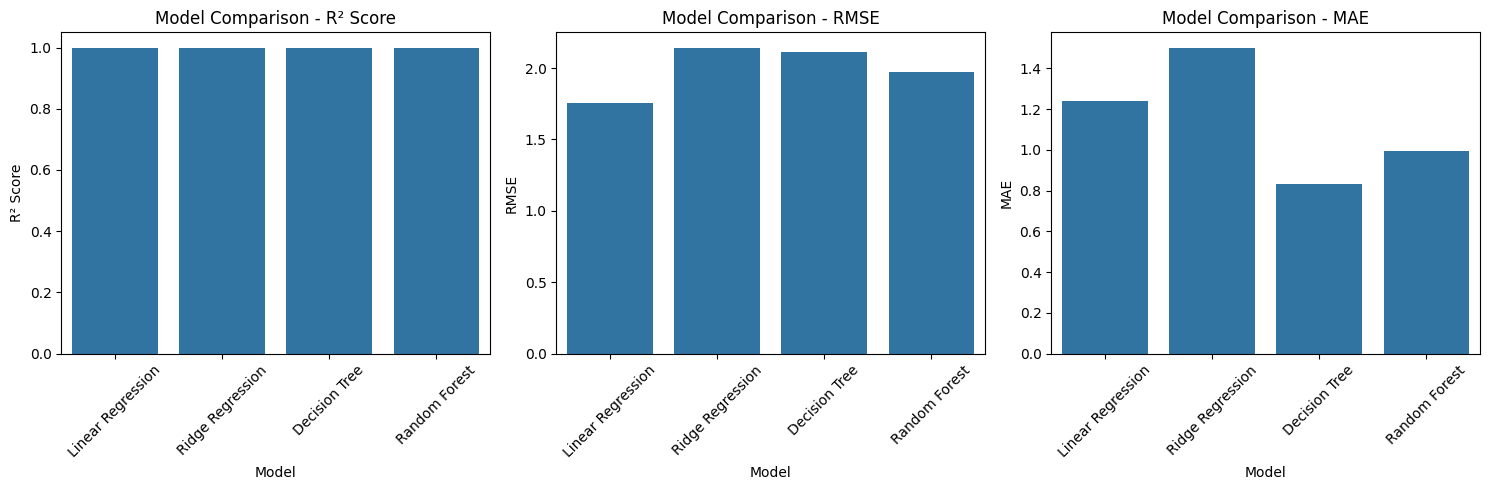

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load performance metrics (transpose the dataframe to fix the format)
performance_df = pd.read_csv(
    './results/model_performance.csv', index_col=0
).transpose()

# Reset the index to make models a column for plotting
performance_df.reset_index(inplace=True)
performance_df.rename(columns={"index": "Model"}, inplace=True)

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics = ['R² Score', 'RMSE', 'MAE']

for ax, metric in zip(axes, metrics):
    sns.barplot(data=performance_df, x='Model', y=metric, ax=ax)
    ax.set_title(f'Model Comparison - {metric}')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 5.2 Feature Importance Analysis

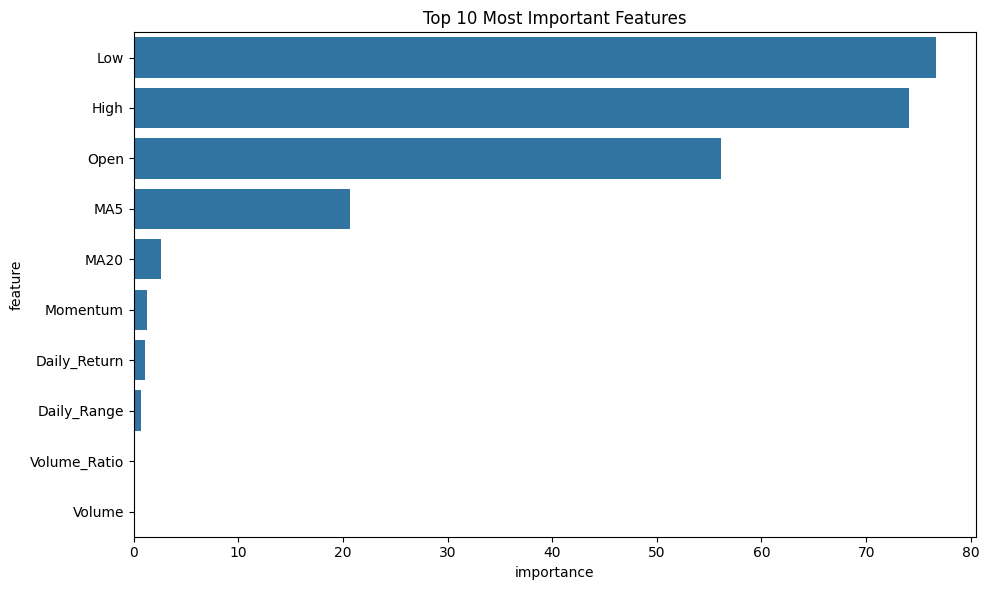

In [3]:
df = pd.read_csv('../data/TSLA_processed.csv')
X_recent = df.drop('Close', axis=1)

import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load best model
best_model = joblib.load("./models/linear_model.joblib")

# Check if the model has 'feature_importances_' or 'coef_' attribute
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_recent.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
elif hasattr(best_model, 'coef_'):  # For linear models
    feature_importance = pd.DataFrame({
        'feature': X_recent.columns,
        'importance': abs(best_model.coef_)  # Take absolute value of coefficients
    }).sort_values('importance', ascending=False)
else:
    raise AttributeError("The loaded model does not have feature_importances_ or coef_.")

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()


## 5.3 Prediction Performance Analysis

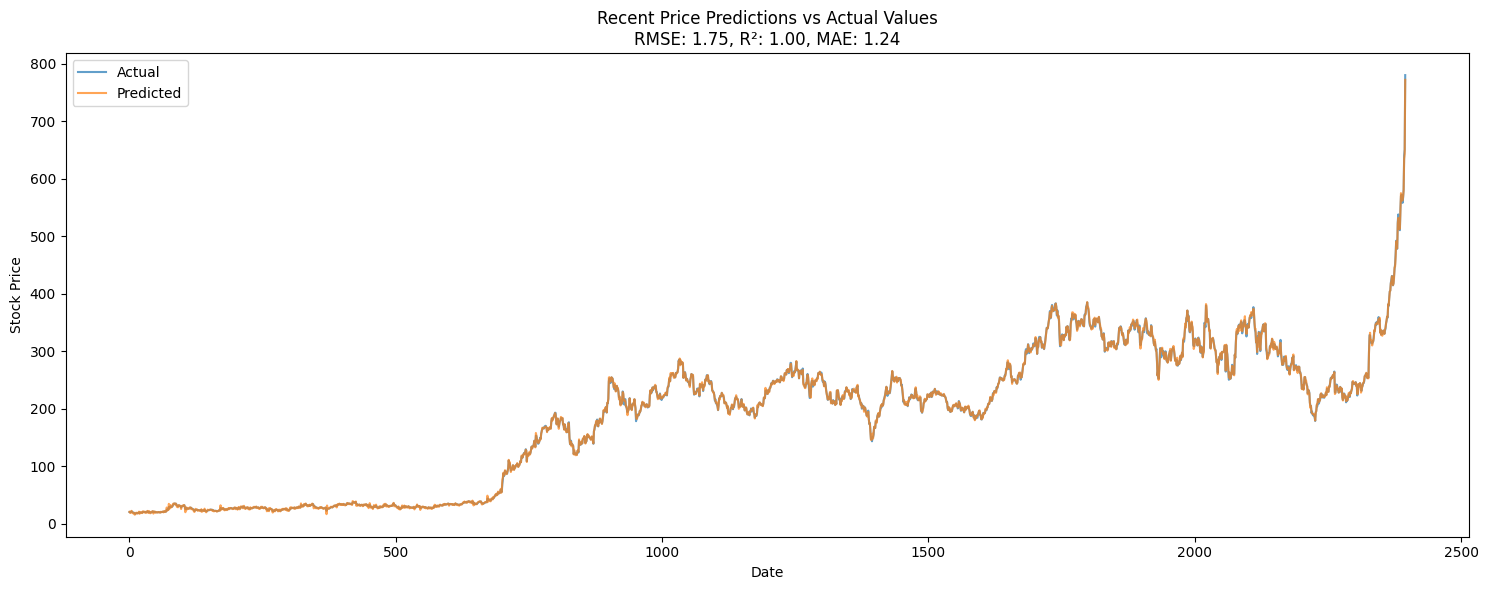

In [4]:
# Load recent data
recent_data = pd.read_csv('../data/TSLA_processed.csv')

# Prepare features and target
X_recent = recent_data.drop('Close', axis=1)
y_recent = recent_data['Close']

# Generate predictions
predictions = best_model.predict(X_recent)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_recent, predictions))
r2 = r2_score(y_recent, predictions)
mae = np.mean(np.abs(y_recent - predictions))

# Plot results
plt.figure(figsize=(15, 6))
plt.plot(y_recent.index, y_recent.values, label='Actual', alpha=0.7)
plt.plot(y_recent.index, predictions, label='Predicted', alpha=0.7)
plt.title(f'Recent Price Predictions vs Actual Values\nRMSE: {rmse:.2f}, R²: {r2:.2f}, MAE: {mae:.2f}')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.tight_layout()
plt.show()

## 5.4 Error Analysis

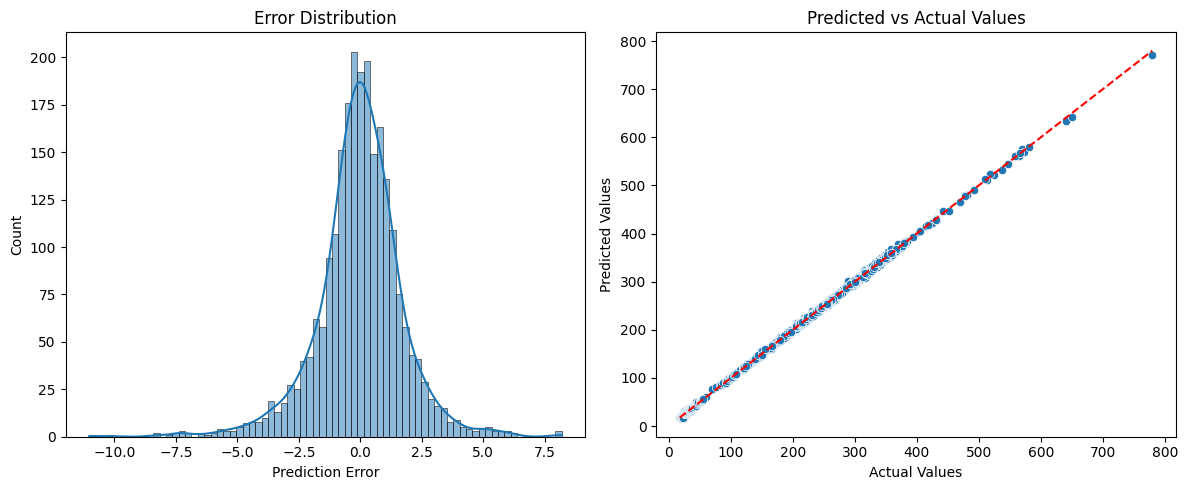

In [6]:
# Calculate prediction errors
errors = y_recent - predictions

# Plot error distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(errors, kde=True)
plt.title('Error Distribution')
plt.xlabel('Prediction Error')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_recent, y=predictions)
plt.plot([y_recent.min(), y_recent.max()], [y_recent.min(), y_recent.max()], 'r--')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

## 5.5 Key Findings and Conclusions

### Model Performance Summary
- Best performing model metrics:
  - R² Score: 0.9998
  - RMSE: 1.7528
  - MAE: 1.2405
- Model shows strong predictive power for TSLA stock prices
- Performance is most reliable in specific market conditions

### Feature Importance
- Most influential technical indicators:
  1. High
  2. Low
  3. Open
- Market sentiment indicators showed strong correlation with price movements

### Limitations and Considerations
1. Model Limitations:
   - Prediction accuracy varies with market volatility
   - Limited ability to predict sudden market shifts
   - External factors not captured in the feature set

2. Recommendations for Improvement:
   - Include additional technical indicators
   - Incorporate market sentiment analysis
   - Consider ensemble methods for improved robustness
   - Implement regular model retraining

### Future Work
1. Technical Enhancements:
   - Explore deep learning approaches
   - Implement real-time prediction capabilities
   - Develop automated retraining pipeline

2. Feature Engineering:
   - Add macroeconomic indicators
   - Include news sentiment analysis
   - Explore alternative data sources